# Internetmålinga / Ekom stats web comparison

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Import and Parse Broadband data

In [3]:
whole_country = pd.read_csv('hele_landet.csv', encoding='latin1', delimiter=';', header=1)

In [4]:
whole_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marknad                  66 non-null     object 
 1   kvartal                  66 non-null     object 
 2   Gjennomsnittshastigheit  66 non-null     float64
 3   Medianverdi              66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


In [5]:
# Convert to correct timestamp
qs = whole_country['kvartal'].str.replace(r'K', r'-Q', regex=True)
qs

0     2011-Q1
1     2011-Q2
2     2011-Q3
3     2011-Q4
4     2012-Q1
       ...   
61    2018-Q1
62    2018-Q2
63    2018-Q3
64    2018-Q4
65    2019-Q3
Name: kvartal, Length: 66, dtype: object

In [6]:
whole_country['date'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()

In [8]:
# offset quarter to end of quarter
whole_country['date'] = whole_country['date'] + pd.offsets.QuarterEnd(0)

In [9]:
# adding stats for 2021-Q2 from Ekomstatistikk

whole_country.loc[len(whole_country.index)] = ['Privat',"2021K2",236.9,150.0,pd.to_datetime('2021-06-30')]
whole_country.loc[len(whole_country.index)] = ['Bedrift',"2021K2",98.9,30.0,pd.to_datetime('2021-06-30')]
whole_country

,marknad,kvartal,Gjennomsnittshastigheit,Medianverdi,date
0,Privat,2011K1,7.4,5.4,2011-03-31
1,Privat,2011K2,10.4,5.7,2011-06-30
2,Privat,2011K3,10.7,6.0,2011-09-30
3,Privat,2011K4,11.4,6.7,2011-12-31
4,Privat,2012K1,12.8,7.2,2012-03-31
...,...,...,...,...,...
63,Bedrift,2018K3,50.3,19.9,2018-09-30
64,Bedrift,2018K4,55.6,20.9,2018-12-31
65,Bedrift,2019K3,59.1,23.0,2019-09-30
66,Privat,2021K2,236.9,150.0,2021-06-30


In [10]:
whole_country.index= whole_country.date

In [11]:
whole_country['mean'] = whole_country['Gjennomsnittshastigheit']

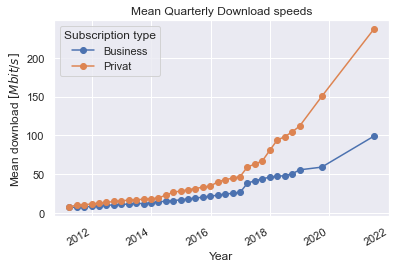

In [12]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
whole_country[whole_country.marknad=='Bedrift']['mean'].plot(kind='line', ax=ax, label='Business', style='-o')
whole_country[whole_country.marknad=='Privat']['mean'].plot(kind='line', ax=ax, label='Privat',  style='-o')
ax.legend(title='Subscription type')
ax.set_xlabel('Year')
ax.set_ylabel('Mean download $[Mbit/s]$')
plt.title("Mean Quarterly Download speeds")
plt.show()

1. kvartal 2017 kom det ei ny endring i inndelinga av hastigheit, som gjer at direkte samanlikning av gjennomsnittshastigheit mot tidlegare kvartal ikkje lenger er mogleg. Medianhastigheita vart ikkje påverka av endringa, og kan samanliknast direkte mot perioder frå 4. kvartal 2008 og utover. 1. kvartal 2017 vart fire av dei lågaste hastigheitskategoriane slått saman til éin kategori (128 Kbit/s til 4 Mbit/s) og det vart lagt til tre nye kategoriar over den som tidlegare var raskast (128 Mbit/s og opp).

In [14]:
whole_country.head(10)

,marknad,kvartal,Gjennomsnittshastigheit,Medianverdi,date,mean
date,,,,,,
2011-03-31,Privat,2011K1,7.4,5.4,2011-03-31,7.4
2011-06-30,Privat,2011K2,10.4,5.7,2011-06-30,10.4
2011-09-30,Privat,2011K3,10.7,6.0,2011-09-30,10.7
2011-12-31,Privat,2011K4,11.4,6.7,2011-12-31,11.4
2012-03-31,Privat,2012K1,12.8,7.2,2012-03-31,12.8
2012-06-30,Privat,2012K2,13.5,7.4,2012-06-30,13.5
2012-09-30,Privat,2012K3,14.8,7.9,2012-09-30,14.8
2012-12-31,Privat,2012K4,15.6,8.6,2012-12-31,15.6
2013-03-31,Privat,2013K1,16.5,9.1,2013-03-31,16.5


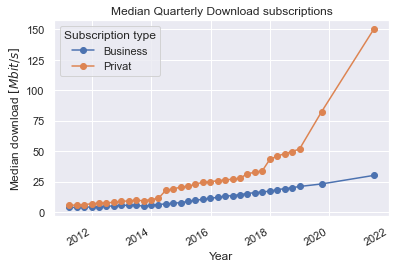

In [15]:
#plot median
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
whole_country[whole_country.marknad=='Bedrift']['Medianverdi'].plot(kind='line', ax=ax, label='Business', style='-o')
whole_country[whole_country.marknad=='Privat']['Medianverdi'].plot(kind='line', ax=ax, label='Privat',  style='-o')
ax.legend(title='Subscription type')
ax.set_xlabel('Year')
ax.set_ylabel('Median download $[Mbit/s]$')
plt.title("Median Quarterly Download subscriptions")
plt.show()

Devision in statistics:
 
* 128 kbit/sekund =< 4 Mbit/sekund
* 4 Mbit/sekund =< 8 Mbit/sekund 
* 8 Mbit/sekund =< 16 Mbit/sekund 
* 16 Mbit/sekund =< 32 Mbit/sekund 
* 32 Mbit/sekund =< 64 Mbit/sekund 
* 64 Mbit/sekund =< 128 Mbit/sekund
* 128 Mbit/sekund =< 256 Mbit/sekund
* 256 Mbit/sekund =< 512 Mbit/sekund
* 512 Mbit/sekund =< 1024 Mbit/sekund

## Import quartarly aggregated Nettfart data 

In [17]:
# ipmort quartelt aggregate from nettfart.no
df_quart = pd.read_csv('../../datasets/Nettfart_quarter_web.csv')
df_quart.Tid = pd.to_datetime(df_quart['Tid'])
df_quart.index= df_quart.Tid
df_quart['median_down'] = df_quart['median_down']
df_quart['mean_down'] = df_quart['mean_down']

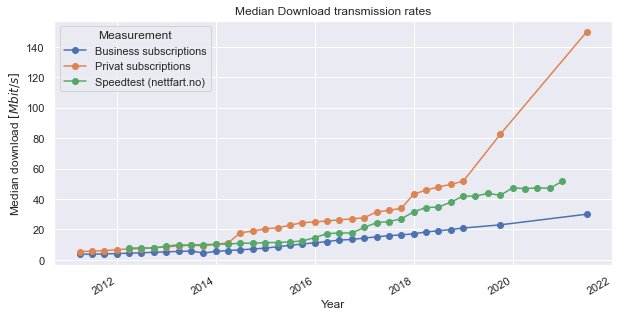

In [20]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
whole_country[whole_country.marknad=='Bedrift']['Medianverdi'].plot(kind='line', ax=ax, label='Business subscriptions', style='-o')
whole_country[whole_country.marknad=='Privat']['Medianverdi'].plot(kind='line', ax=ax, label='Privat subscriptions',  style='-o')
df_quart['median_down'].plot(kind='line', ax=ax, label='Speedtest (nettfart.no)',  style='-o')

ax.legend(title='Measurement')
ax.set_xlabel('Year')
ax.set_ylabel('Median download $[Mbit/s]$')
plt.title("Median Download transmission rates")
#plt.savefig("../figs/median_dl_web_subs")
plt.show()

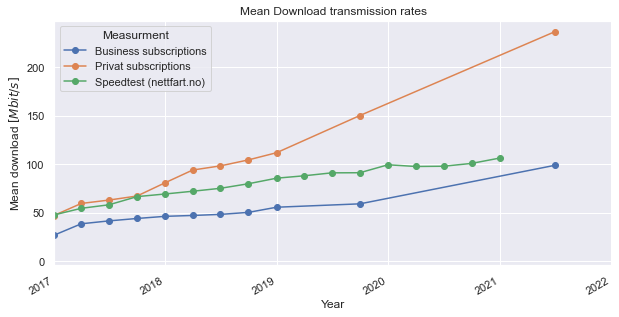

In [21]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
whole_country[whole_country.marknad=='Bedrift']['mean'].plot(kind='line', ax=ax, label='Business subscriptions', style='-o')
whole_country[whole_country.marknad=='Privat']['mean'].plot(kind='line', ax=ax, label='Privat subscriptions',  style='-o')
df_quart['mean_down'].plot(kind='line', ax=ax, label='Speedtest (nettfart.no)',  style='-o')

ax.legend(title='Measurment')
ax.set_xlim(pd.to_datetime('2017'))
ax.set_xlabel('Year')
ax.set_ylabel('Mean download $[Mbit/s]$')
plt.title("Mean Download transmission rates")
#plt.savefig("../figs/mean_dl_web_subs")
plt.show()

In [16]:
pd.to_datetime('2021-Q2')

Timestamp('2021-04-01 00:00:00')

## Proportions of fixed broadband and compared to proportions of measurmenst in same category

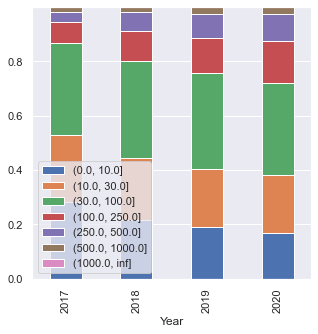

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

norm_bins.plot(kind='bar', stacked=True ,ax=ax, width = 0.45)
ax.set_xlabel("Year")
plt.show()


In [30]:
ekom_bins= pd.read_csv('../../datasets/ekom_bin_count_down.csv', delimiter=',')
ekom_bins.index = pd.to_datetime(ekom_bins.Tid).dt.year
ekom_bins = ekom_bins.drop('Tid', axis=1)
ekom_bins = ekom_bins.div(100, axis = 1)
ekom_bins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2017 to 2020
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (0.0, 10.0]      4 non-null      float64
 1   (10.0, 30.0]     4 non-null      float64
 2   (30.0, 100.0]    4 non-null      float64
 3   (100.0, 250.0]   4 non-null      float64
 4   (250.0, 500.0]   4 non-null      float64
 5   (500.0, 1000.0]  4 non-null      float64
 6   (1000.0, inf]    4 non-null      float64
dtypes: float64(7)
memory usage: 256.0 bytes


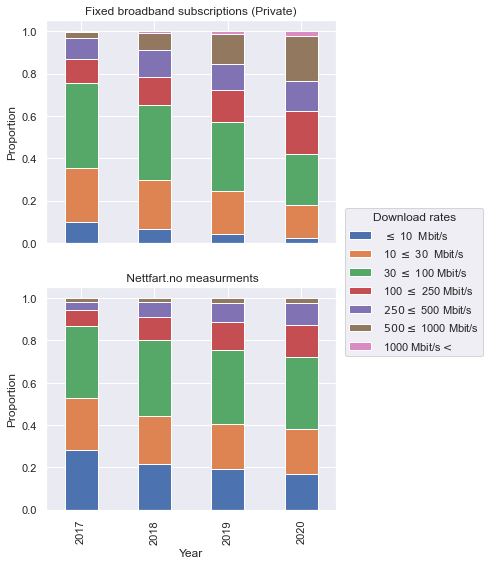

In [31]:
fig, ax = plt.subplots(figsize=(7,9),nrows= 2 ,sharey=True, sharex=True)

ekom_bins.plot(kind='bar', stacked=True ,ax=ax[0], width = 0.45 ,legend=False ,title="Fixed broadband subscriptions (Private)")
norm_bins.plot(kind='bar', stacked=True ,ax=ax[1], width = 0.45, legend=False, title=" Nettfart.no measurments")
handles, labels = ax[0].get_legend_handles_labels()
labels = [" $\leq$ 10  Mbit/s ", " 10 $\leq$ 30  Mbit/s"," 30 $\leq$ 100 Mbit/s"," 100 $\leq$ 250 Mbit/s"," $ 250 \leq$ 500 Mbit/s"," $ 500 \leq$ 1000 Mbit/s"," 1000 Mbit/s$<$"]
fig.legend(handles, labels, loc='center right', title= "Download rates")
ax[1].set_xlabel("Year")
ax[0].set_xlabel("Year")
ax[1].set_ylabel("Proportion")
ax[0].set_ylabel("Proportion")
plt.subplots_adjust(right= 0.7 , wspace= 0.1)
# plt.savefig("../figs/pro_fixed_broadband_and_nettfart")
plt.show()



In [32]:
ekom_bins.head()

,"(0.0, 10.0]","(10.0, 30.0]","(30.0, 100.0]","(100.0, 250.0]","(250.0, 500.0]","(500.0, 1000.0]","(1000.0, inf]"
Tid,,,,,,,
2017,0.100,0.254,0.402,0.115,0.097,0.027,0.005
2018,0.065,0.231,0.355,0.132,0.128,0.081,0.009
2019,0.044,0.201,0.327,0.151,0.120,0.143,0.013
2020,0.024,0.155,0.241,0.203,0.140,0.214,0.022


In [33]:
norm_bins.head().round(2)

,"(0.0, 10.0]","(10.0, 30.0]","(30.0, 100.0]","(100.0, 250.0]","(250.0, 500.0]","(500.0, 1000.0]","(1000.0, inf]"
Tid,,,,,,,
2017,0.28,0.25,0.34,0.08,0.04,0.02,0.0
2018,0.22,0.23,0.36,0.11,0.07,0.02,0.0
2019,0.19,0.21,0.35,0.13,0.09,0.03,0.0
2020,0.17,0.21,0.34,0.15,0.10,0.03,0.0
